## Group 6 - Math for AI, AI23 @ HCMUS
- 23122013 - Đinh Đức Tài
- 23122002 - Nguyễn Đình Hà Dương
- 23122004 - Nguyễn Lê Hoàng Trung
- 23122014 - Hoàng Minh Trung

## [Lab1] Linear Regression

In [1]:
# Importing the libraries: numpy, matplotlib, pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part I: Explore train.csv

In [2]:
# Read the CSV file
file_path = './data/train.csv'
data = pd.read_csv(file_path)

# Print information about the file
print("Number of rows:", len(data))
print("Column names:", data.columns.tolist())

# Print the first 5 rows of the data
print("\nFirst 5 rows of data:")
data.head()

Number of rows: 1647
Column names: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

First 5 rows of data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [3]:
def get_column_info(data):
    print("\nInformation about the columns:")
    column_info = pd.DataFrame({
        'Column Name': data.columns,
        'Description': [
            "Hãng xe", "Mẫu xe", "Giá xe (VNĐ)", "Năm sản xuất", "Số km đã đi", 
            "Loại nhiên liệu", "Hộp số", "Địa điểm bán", "Màu xe", "Số chủ sở hữu trước đó", 
            "Loại người bán", "Dung tích động cơ (cc)", "Công suất tối đa (bhp)", 
            "Mô-men xoắn tối đa (Nm)", "Hệ dẫn động", "Chiều dài xe (mm)", 
            "Chiều rộng xe (mm)", "Chiều cao xe (mm)", "Số chỗ ngồi", 
            "Dung tích bình nhiên liệu (lít)"
        ],
        'Data Type': data.dtypes.values,
        'Number of NaN': data.isna().sum().values,
        'Unique Values': data.nunique().values,
        'Most Frequent Value': data.mode().iloc[0].values,
    })

    return column_info

print("\nNumber of rows with NaN values:", data.isna().any(axis=1).sum())

# Print information about the columns
column_info = get_column_info(data)
column_info


Number of rows with NaN values: 149

Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,object,0,6,First


In [4]:
def unique_values(data):
    print("\nUnique values of some columns:")
    print("Fuel Type:", data['Fuel Type'].unique())
    print("Transmission:", data['Transmission'].unique())
    print("Seller Type:", data['Seller Type'].unique())
    print("Drivetrain:", data['Drivetrain'].unique())

    print("Owner:", data['Owner'].unique())
    print("Seating Capacity:", data['Seating Capacity'].unique())

unique_values(data)


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: [nan 'RWD' 'FWD' 'AWD']
Owner: ['Second' 'First' 'Third' 'UnRegistered Car' '4 or More' 'Fourth']
Seating Capacity: [nan  5.  7.  2.  6.  8.  4.]


## Part II: Data Preprocessing

#### II.1: Data cleaning

In [5]:
# Handle missing values
# Fill numeric columns with their mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean().astype(int))

# Fill categorical columns with the most frequent value
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Remove duplicates
data = data.drop_duplicates()

# Reset index after cleaning
data.reset_index(drop=True, inplace=True)

# Print summary after cleaning
print("Data cleaned successfully!")
print("Number of rows after cleaning:", len(data))
print("Number of missing values after cleaning:", data.isna().sum().sum())

Data cleaned successfully!
Number of rows after cleaning: 1647
Number of missing values after cleaning: 0


#### II.2: Data Transformation

In [6]:
# Standardize the data

# 'Engine' ('cc') -> float
data['Engine'] = data['Engine'].astype(str).str.replace(' cc', '').astype(float)

# 'Max Power' ('bhp') -> int
data['Max Power'] = data['Max Power'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

# 'Max Torque' ('Nm') -> int
data['Max Torque'] = data['Max Torque'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

# 'Seating Capacity' -> int
data['Seating Capacity'] = data['Seating Capacity'].astype(int)

# 'Fuel Tank Capacity' -> int
data['Fuel Tank Capacity'] = data['Fuel Tank Capacity'].astype(int)

# 'Owner' -> int
data['Owner'] = data['Owner'].map({
    'UnRegistered Car': 0,
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    '4 or More': 5,
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
})

print(data[['Engine', 'Max Power', 'Max Torque', 'Seating Capacity', 'Fuel Tank Capacity']].head())

   Engine  Max Power  Max Torque  Seating Capacity  Fuel Tank Capacity
0  1197.0         89         200                 5                  52
1  1995.0        184         350                 5                  63
2  1997.0        138         320                 7                  70
3  2925.0        326         700                 7                  90
4  2755.0        174         450                 7                  80


#### II.3: Explore data after cleaning

In [7]:
get_column_info(data)


Information about the columns:


,Column Name,Description,Data Type,Number of NaN,Unique Values,Most Frequent Value
0,Make,Hãng xe,object,0,31,Maruti Suzuki
1,Model,Mẫu xe,object,0,912,X1 sDrive20d xLine
2,Price,Giá xe (VNĐ),int64,0,564,425000
3,Year,Năm sản xuất,int64,0,21,2017
4,Kilometer,Số km đã đi,int64,0,701,42000
5,Fuel Type,Loại nhiên liệu,object,0,8,Diesel
6,Transmission,Hộp số,object,0,2,Manual
7,Location,Địa điểm bán,object,0,76,Mumbai
8,Color,Màu xe,object,0,17,White
9,Owner,Số chủ sở hữu trước đó,int64,0,6,1


In [8]:
unique_values(data)


Unique values of some columns:
Fuel Type: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Transmission: ['Automatic' 'Manual']
Seller Type: ['Individual' 'Corporate' 'Commercial Registration']
Drivetrain: ['FWD' 'RWD' 'AWD']
Owner: [2 1 3 0 5 4]
Seating Capacity: [5 7 2 6 8 4]


In [9]:
object_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# List of object columns and their unique values
object_columns_list = [(col, data[col].nunique()) for col in object_columns]

# List of numeric columns and their unique values
numeric_columns_list = [(col, data[col].nunique()) for col in numeric_columns]

print("Object Columns and Unique Values:")
print(object_columns_list)

print("\nNumeric Columns and Unique Values:")
print(numeric_columns_list)

Object Columns and Unique Values:
[('Make', 31), ('Model', 912), ('Fuel Type', 8), ('Transmission', 2), ('Location', 76), ('Color', 17), ('Seller Type', 3), ('Drivetrain', 3)]

Numeric Columns and Unique Values:
[('Price', 564), ('Year', 21), ('Kilometer', 701), ('Owner', 6), ('Engine', 101), ('Max Power', 156), ('Max Torque', 128), ('Length', 231), ('Width', 160), ('Height', 187), ('Seating Capacity', 6), ('Fuel Tank Capacity', 50)]


## Part IV: Data visualization

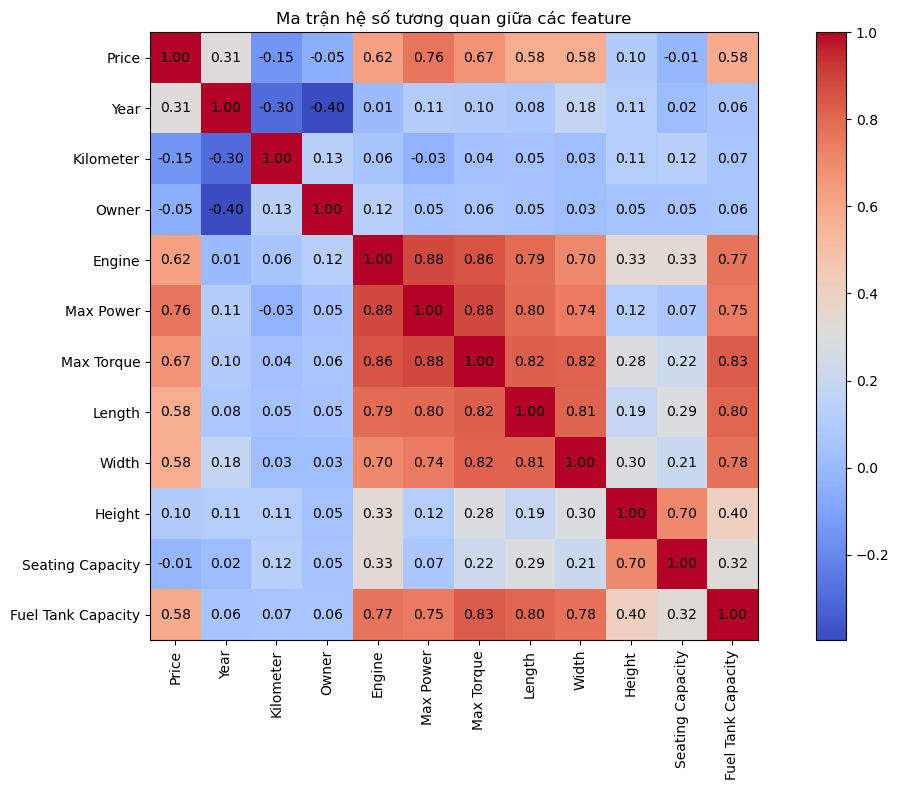

In [10]:
# Compute the correlation matrix using only numeric features
corr_matrix = data[numeric_columns].corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Ma trận hệ số tương quan giữa các feature")

# Annotate the matrix with correlation coefficients
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

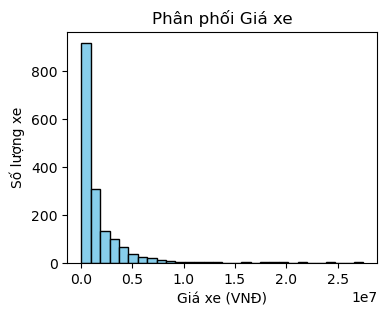

/tmp/nix-shell-22877-0/ipykernel_51758/2913228810.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, patch_artist=True, labels=fuel_types)


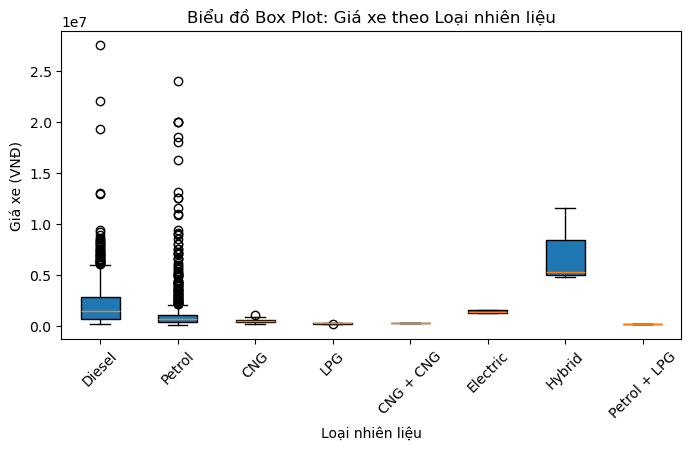

In [11]:
# Additional Data Visualization Techniques using Matplotlib only

# 1. Histogram: Phân phối giá xe
plt.figure(figsize=(4, 3))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Phân phối Giá xe')
plt.xlabel('Giá xe (VNĐ)')
plt.ylabel('Số lượng xe')
plt.show()

# 3. Box Plot: Giá xe theo Loại nhiên liệu
plt.figure(figsize=(8, 4))
fuel_types = data['Fuel Type'].unique()
groups = [data.loc[data['Fuel Type'] == ft, 'Price'] for ft in fuel_types]
plt.boxplot(groups, patch_artist=True, labels=fuel_types)
plt.title('Biểu đồ Box Plot: Giá xe theo Loại nhiên liệu')
plt.xlabel('Loại nhiên liệu')
plt.ylabel('Giá xe (VNĐ)')
plt.xticks(rotation=45)
plt.show()

# 5. Pair Plot: Sử dụng scatter_matrix từ pandas.plotting để thể hiện mối quan hệ giữa các biến số kỹ thuật số
# from pandas.plotting import scatter_matrix

# plt.figure(figsize=(12, 12))
# scatter_matrix(data[numeric_columns], alpha=0.5, figsize=(12, 12), diagonal='hist')
# plt.suptitle('Biểu đồ Pair Plot của các biến số kỹ thuật số', y=0.9)
# plt.show()

## Part V: Linear Regression models

#### V.I: Split dataset

In [12]:
# Split the data into training and testing sets
X = data.drop(columns=['Price'])
y = data['Price']
# X_train = 80% of the data, y_train = 80% of the data
# X_eval = 20% of the data, y_eval = 20% of the data
X_train = X.sample(frac=0.8, random_state=0)
X_eval = X.drop(X_train.index)
y_train = y[X_train.index]
y_eval = y[X_eval.index]

#### V.II: Tools to evaluate the models

In [13]:
# Function to evaluate the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    SSE = np.sum((y_true - y_pred) ** 2)
    SST = np.sum((y_true - np.mean(y_true)) ** 2) 
    return 1 - (SSE / SST) # R^2 = 1 - SSE/SST = SSR/SST

def evaluate_model(y_true, y_pred):
    model_eval = pd.DataFrame({
        'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'],
        'Value': [mse(y_true, y_pred), rmse(y_true, y_pred), mae(y_true, y_pred), r2_score(y_true, y_pred)]
    })

    return model_eval

#### V.III: Simple Linear Regression model from Statistics's point of view
Based on Correlation coefficient map, we choose feature **Max Power**

In [14]:
# Y = beta0 + beta1*X
# beta1 = Sxx / Sxy
# beta0 = mean(Y) - beta1 * mean(X)
# Sxx = sum((X - mean(X))^2)
# Sxy = sum((X - mean(X)) * (Y - mean(Y)))

def simple_linear_regression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    Sxx = np.sum((X - mean_X) ** 2)
    Sxy = np.sum((X - mean_X) * (y - mean_y))
    beta1 = Sxy / Sxx
    beta0 = mean_y - beta1 * mean_X
    return beta0, beta1

result = []

for F in numeric_columns[numeric_columns != 'Price']:
    # Predict the price of a car based on feature F
    beta0, beta1 = simple_linear_regression(X_train[F], y_train)
    # print(f"{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

    # Predict the price of a car based on feature F
    y_pred = beta0 + beta1 * X_train[F]

    # Evaluate the model on train set
    model_eval = evaluate_model(y_train, y_pred)
    result.append([F, model_eval, beta0, beta1])

Metric = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']

for i, metric in enumerate(Metric):
    best = result[0]
    for res in result:
        if (res[1].iloc[i, 1] < best[1].iloc[i, 1] and metric != 'R^2 Score') or \
           (res[1].iloc[i, 1] > best[1].iloc[i, 1] and metric == 'R^2 Score'):
            best = res
    print(f"Best feature for {metric}: {best[0]}. Value: {best[1].iloc[i, 1]}")

# => Max Power (best[0]) is the best feature for all metrics 
id_BestFeature_in_result = [i for i in range(len(result)) if result[i][0] == best[0]][0]

beta0 = result[id_BestFeature_in_result][2]
beta1 = result[id_BestFeature_in_result][3]
F = result[id_BestFeature_in_result][0]
print(f"\n{F} feature: Price = {beta0:.2f} + {beta1:.2f} * {F}")

print("\nEvaluation metrics on Train Set:")
result[id_BestFeature_in_result][1]

Best feature for Mean Squared Error: Max Power. Value: 2237234022679.982
Best feature for Root Mean Squared Error: Max Power. Value: 1495738.6211099792
Best feature for Mean Absolute Error: Max Power. Value: 813398.2923550394
Best feature for R^2 Score: Max Power. Value: 0.6111670007388921

Max Power feature: Price = -1919276.66 + 28225.79 * Max Power

Evaluation metrics on Train Set:


,Metric,Value
0,Mean Squared Error,2.237234e+12
1,Root Mean Squared Error,1.495739e+06
2,Mean Absolute Error,8.133983e+05
3,R^2 Score,6.111670e-01


In [15]:
print("\nEvaluation metrics on Evaluation Set:")
y_pred = beta0 + beta1 * X_eval['Max Power']
model_eval = evaluate_model(y_eval, y_pred)
model_eval


Evaluation metrics on Evaluation Set:


,Metric,Value
0,Mean Squared Error,2.785209e+12
1,Root Mean Squared Error,1.668894e+06
2,Mean Absolute Error,8.228715e+05
3,R^2 Score,4.232053e-01


#### V.IV: Multiple Linear Regression model

#### V.V: Polynomial Regression model

#### V.VI: Linear Regression model with PCA